<a href="https://colab.research.google.com/github/Arnxmn/Happiness_Score_Lab/blob/main/final_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
# File used in the lab
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0272EN-SkillsNetwork/labs/dataset/2016.csv"

In [3]:
# Read file and passit on to a dataframe
df = pd.read_csv(URL)

In [4]:
# Check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      153 non-null    float64
 5   Upper Confidence Interval      155 non-null    object 
 6   Economy (GDP per Capita)       156 non-null    object 
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       155 non-null    object 
 9   Freedom                        157 non-null    object 
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [5]:
# Get stats
df.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Family,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,153.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.268641,0.793621,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.151503,0.266706,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.322000,0.641840,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.226000,0.841420,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.128000,1.021520,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,1.183260,0.505210,0.819710,3.837720


In [6]:
# Check values
df.head(n=10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.59,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.8276,0.5737,0.31329,0.44834,2.70485
6,Netherlands,Western Europe,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,Australia and New Zealand,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,Australia and New Zealand,9,7.313,7.241,7.385,1.44443,1.10476,0.8512,0.56837,0.32331,0.47407,2.54650
9,Sweden,Western Europe,10,7.291,7.227,NaN,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [7]:
# Calculate # of null records
null_count = df.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 9


In [8]:
# Check columns with empty cells, NaN, Missing values, etc

# Create list with missing values types
missing_values = df.isin(['', ' ','.', 'NaN', None])

# Display columns with missing values
print("Columns with missing values:")
for col in missing_values.columns:
    if missing_values[col].any():
        print(col)

Columns with missing values:
Upper Confidence Interval
Economy (GDP per Capita)
Health (Life Expectancy)
Freedom


In [9]:
# Replace empty cells and such by the mean
import numpy as np

# Function to replace blank with NaN
def replace_blank_with_nan(value):
    if isinstance(value, str) and value.strip() == '':
        return np.nan
    return value

# Apply the function to all elements in the DataFrame
df = df.map(replace_blank_with_nan)

In [10]:
# Now that blanks are nulls, convert columns from object to float
df['Upper Confidence Interval'] = df['Upper Confidence Interval'].astype(float)
df['Economy (GDP per Capita)'] = df['Economy (GDP per Capita)'].astype(float)
df['Health (Life Expectancy)'] = df['Health (Life Expectancy)'].astype(float)
df['Freedom'] = df['Freedom'].astype(float)

In [11]:
# Calculate the mean of each column, ignoring NaN values
column_means = df.mean(numeric_only=True)
column_means

,0
Happiness Rank,78.980892
Happiness Score,5.382185
Lower Confidence Interval,5.268641
Upper Confidence Interval,5.472753
Economy (GDP per Capita),0.951772
Family,0.793621
Health (Life Expectancy),0.553342
Freedom,0.370999
Trust (Government Corruption),0.137624
Generosity,0.242635


In [12]:
# Fill null values with the mean of the respective column
df_inputed = df.fillna(column_means)

In [14]:
# Check # of null records of imputed dataframe
null_count = df_inputed.isnull().sum().sum()
print('Number of null values:', null_count)

Number of null values: 0


In [15]:
# Check info of inputed dataframe
df_inputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [16]:
# Count the number of rows for each country
summ_1 = df_inputed['Country'].value_counts().reset_index()
summ_1.columns = ['country', 'count']

# Sort by count in descending order (already done by value_counts, but included for clarity)
summ_1 = summ_1.sort_values('count', ascending=False)

# Display the result
print(summ_1)

         country  count
0        Denmark      1
108       Israel      1
101      Iceland      1
102       Norway      1
103      Finland      1
..           ...    ...
53        Rwanda      1
54         Benin      1
55   Afghanistan      1
56          Togo      1
156      Burundi      1

[157 rows x 2 columns]


In [17]:
# Calculate AVG Happiness score, Region wise
summ_2 = df_inputed.groupby('Region')['Happiness Score'].agg(['mean','count']).reset_index()
summ_2.columns = ['Region', 'Avg Happiness Score', '# countries']
summ_2 = summ_2.sort_values('Avg Happiness Score', ascending=False)

# Display the result
print(summ_2)

                            Region  Avg Happiness Score  # countries
0        Australia and New Zealand             7.323500            2
5                    North America             7.254000            2
9                   Western Europe             6.685667           21
3      Latin America and Caribbean             6.101750           24
2                     Eastern Asia             5.624167            6
4  Middle East and Northern Africa             5.386053           19
1       Central and Eastern Europe             5.370690           29
6                Southeastern Asia             5.338889            9
7                    Southern Asia             4.563286            7
8               Sub-Saharan Africa             4.136421           38


In [18]:
# Identify the GDP per capita and Healthy Life Expectancy of the top 10 countries. (Use Happiness Ranking to order)
top_10 = df_inputed.nsmallest(10,'Happiness Rank')
top_10[['Country','Happiness Rank', 'Economy (GDP per Capita)', 'Health (Life Expectancy)']]

,Country,Happiness Rank,Economy (GDP per Capita),Health (Life Expectancy)
0,Denmark,1,1.44178,0.79504
1,Switzerland,2,1.52733,0.86303
2,Iceland,3,1.42666,0.86733
3,Norway,4,1.57744,0.79579
4,Finland,5,1.40598,0.81091
5,Canada,6,1.44015,0.82760
6,Netherlands,7,1.46468,0.81231
7,New Zealand,8,1.36066,0.83096
8,Australia,9,1.44443,0.85120
9,Sweden,10,1.45181,0.83121


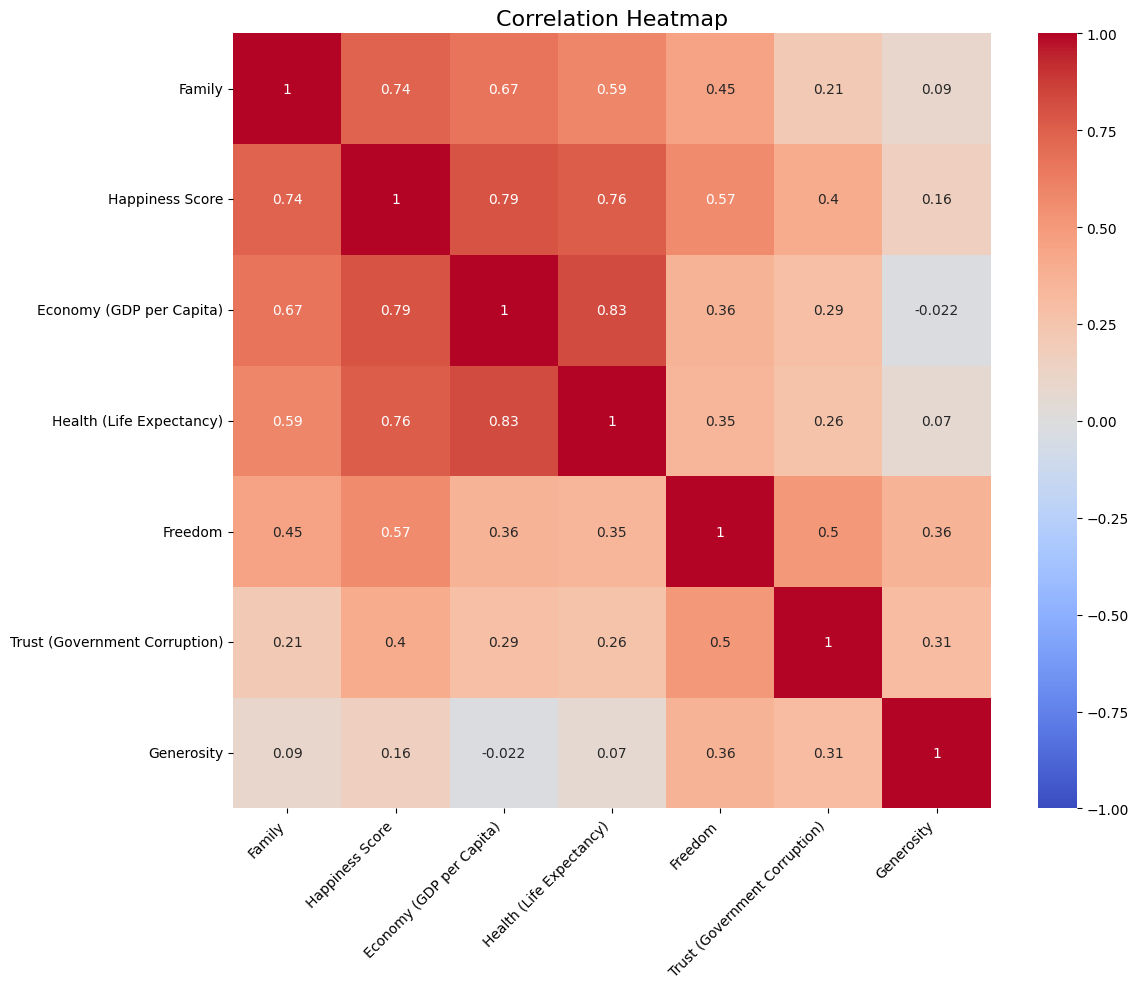

In [19]:
# Find the correlation between the Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity and Happiness score.
# You may like to represent the correlation as a heatmap of a readable, visually appealing size.

import matplotlib.pyplot as plt

# Create a dataframe only with the columns we want
corr_df = df_inputed[['Family','Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)', 'Generosity']]

# Compute the correlation matrix
correlation_matrix = corr_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title of the heatmap
plt.title('Correlation Heatmap', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Same correlation heatmap but using plotly
import plotly.graph_objects as go
import plotly.io as pio

# Create the heatmap using Plotly
fig_heatmap = go.Figure(data=go.Heatmap(
                z=correlation_matrix.values,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                colorscale='RdBu',
                zmin=-1, zmax=1,
                colorbar=dict(title='Correlation')
))

# Update the layout
fig_heatmap.update_layout(
    title='Correlation Heatmap : Happiness Score',
    xaxis_title='Variables',
    yaxis_title='Variables',
    width=800,
    height=700
)

# Show the plot
fig_heatmap.show()

In [25]:
# Create a scatter plot to identify the effect of GDP per Capita on Happiness Score in various Regions. Use plotly for creating the plot.
import plotly.express as px

# Create the scatter plot
fig_scatter = px.scatter(df_inputed, x='Economy (GDP per Capita)', y='Happiness Score', color='Region',
                 hover_data=['Region', 'Economy (GDP per Capita)', 'Happiness Score'],
                 #trendline='ols',
                 title='Happiness Score vs Region Economy (GDP per Capita) by Region')

# Customize the layout
fig_scatter.update_layout(
    xaxis_title='Economy (GDP per Capita)',
    yaxis_title='Happiness Score',
    legend_title='Region',
    font=dict(size=12)
)

# Show the plot
fig_scatter.show()

In [26]:
# Create similar plot but each Region in a separate plot

# Create the faceted scatter plot
fig_scatter_sep = px.scatter(df, x='Economy (GDP per Capita)', y='Happiness Score', color='Region',
                 facet_col='Region', facet_col_wrap=4,
                 hover_data=['Region', 'Economy (GDP per Capita)', 'Happiness Score'],
                 title='Happiness Score vs Economy (GDP per Capita) - by Region')

# Customize the layout
fig_scatter_sep.update_layout(
    height=900,  # Adjust height as needed
    width=1200,  # Adjust width as needed
    title_x=0.5,  # Center the main title
    font=dict(size=12),
    legend=dict(
        yanchor="top",
        y=0.3,  # Adjust this value to move the legend up or down
        xanchor="right",
        x=0.99   # Adjust this value to move the legend left or right
    )
)

# Remove all axis titles
fig_scatter_sep.update_xaxes(title_text='')
fig_scatter_sep.update_yaxes(title_text='')

# Remove redundant region names from subplot titles
for annotation in fig_scatter_sep.layout.annotations:
    annotation.text = annotation.text.split("=")[-1]

# Add a single x-axis title for the entire plot
fig_scatter_sep.add_annotation(
    x=0.5, y=-0.1,
    text="Economy (GDP per Capita)",
    showarrow=False,
    xref='paper', yref='paper',
    font=dict(size=14)
)

# Add a single y-axis title for the entire plot
fig_scatter_sep.add_annotation(
    x=-0.07, y=0.5,
    text="Happiness Score",
    textangle=-90,
    showarrow=False,
    xref='paper', yref='paper',
    font=dict(size=14)
)
# Show the plot
fig_scatter_sep.show()

In [48]:
# Create a bar chart to present Happiness Score by Regions

# Calculate the average Happiness Score for each Region
#df_avg = df_inputed.groupby('Region')['Happiness Score'].mean().reset_index()
# Actually let´s use the dataframe summ_2 that already has this information

# Create the bar chart
fig_bar_avg = px.bar(summ_2, x='Region', y ='Avg Happiness Score',
             title='Average Happiness Scores by Region',
             hover_data=['# countries'],
             text='Avg Happiness Score')

# Customize the layout
fig_bar_avg.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_bar_avg.update_layout(
    xaxis_title=' ',
    yaxis_title=' ',
    yaxis=dict(showticklabels=False),  # Hide y-axis tick labels
    #xaxis_tickangle=-45,
    xaxis=dict(
        tickmode='array',
        tickvals=summ_2['Region'],
        ticktext=['<br>'.join(region.split()) for region in summ_2['Region']],
        tickfont=dict(size=10)
    ),
    yaxis_range=[0, summ_2['Avg Happiness Score'].max() * 1.1]  # Set y-axis range with some headroom

)
# Show the plot
fig_bar_avg.show()

In [49]:
# Create a map to display GDP per capita of countries and include Healthy life expectancy to be shown as a tooltip

# Create a continuous color scale with purple shades
color_scale = [
    (0, "rgb(242, 240, 247)"),  # Lightest purple
    (0.2, "rgb(218, 218, 235)"),
    (0.4, "rgb(188, 189, 220)"),
    (0.6, "rgb(158, 154, 200)"),
    (0.8, "rgb(117, 107, 177)"),
    (1, "rgb(84, 39, 143)")     # Darkest purple
]

# Create the choropleth map
fig_map = px.choropleth(df,
                    locations="Country",
                    locationmode="country names",
                    color="Economy (GDP per Capita)",
                    hover_name="Country",
                    hover_data=["Health (Life Expectancy)"],
                    color_continuous_scale=color_scale, #px.colors.sequential.Plasma,
                    title="GDP per Capita by Country")

# Update the layout
fig_map.update_layout(
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

# Show the plot
fig_map.show()

In [61]:
#!pip install dash
#!pip install dash_bootstrap_components
import dash
from dash import html, dcc
import dash_bootstrap_components as dbc

# Initialize the Dash app with Bootstrap
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout
app.layout = dbc.Container([
    html.H1("Static Report : Happiness Score 2016", className="text-center mt-4 mb-4"),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='figure1', figure=fig_heatmap)
        ], width=6),
        dbc.Col([
            dcc.Graph(id='figure2', figure=fig_scatter_sep)
        ], width=6)
    ]),

    dbc.Row([
        dbc.Col([
            dcc.Graph(id='figure3', figure=fig_bar_avg)
        ], width=6),
        dbc.Col([
            dcc.Graph(id='figure4', figure=fig_map)
        ], width=6)
    ])
], fluid=True)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>